# Gestión Moderna de Portafolio
### Autores Bernardo León y Carlos Zapata
### (C) Copyright 2023


## Capitulo 1: Medidas de retorno y riesgo de los activos financieros y portafolios de inversión

### Ejemplos 1.2, 1.3 y 1.4

In [2]:
#Librerías usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install --quiet yfinance
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.9 MB/s eta 0:00:00


[*********************100%***********************]  2 of 2 completed


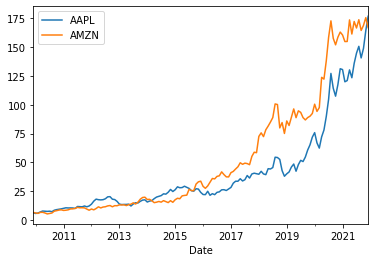

In [3]:
# Get the data for the stock AAPL
fechai = "2009-12-01"
fechaf = "2021-12-31"
periodicidad = "1Mo"
activos = ["AAPL","AMZN"]
precios = yf.download(activos,start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
precios.plot();

In [4]:
# Ejemplo 1.2
# Calculo de los retornos anualizados
retornos = np.log(precios/precios.shift(1)).dropna()
mu = retornos.mean()*12
round(mu, 4)

AAPL    0.2762
AMZN    0.2675
dtype: float64

Text(0.5, 1.0, 'AMZN')

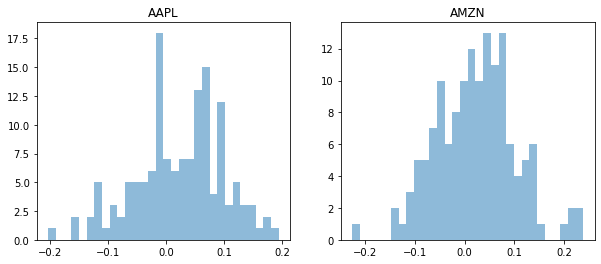

In [5]:
# Histograma de los retornos
fig, hist = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
hist[0].hist(x=retornos['AAPL'], bins=30, alpha=0.5)
hist[0].set_title('AAPL')
hist[1].hist(x=retornos['AMZN'], bins=30, alpha=0.5)
hist[1].set_title('AMZN')

In [6]:
# Medidas de riesgo de los activos
# covarianzas anualizadas
# Ejemplo 1.3
cov = retornos.cov()
cov = cov*12
round(cov,4)

,AAPL,AMZN
AAPL,0.0700,0.0307
AMZN,0.0307,0.0749


In [ ]:
# Volatilidad  anualizada
sigma = retornos.std()
sigma = sigma*np.sqrt(12)
round(sigma,4)

AAPL    0.2645
AMZN    0.2737
dtype: float64

In [ ]:
cor = retornos['AAPL'].corr(retornos['AMZN'])
round(cor,4)

0.4236

In [ ]:
# Retorno del portafolio
# w(AAPL) = w(AMZN) = 0.5
n = 2
w = np.repeat(0.5,n)
rp = w @ mu
round(rp,4)

0.2719

In [ ]:
# Riesgo del portafolio
# w(AAPL) = w(AMZN) = 0.5
n = 2
w = np.repeat(0.5,n)
# Formula matricial
sigmap = np.sqrt(w.T @ cov @ w)
round(sigmap,4)

0.2271

In [ ]:
# Formula simple
w1 = w2 = 0.5
sigma1 = sigma['AAPL']
sigma2 = sigma['AMZN']
sigmap = np.sqrt(w1**2 * sigma1**2+ w2**2 * sigma2**2 + 2*w1*w2*sigma1*sigma2*cor)
round(sigmap,4)

0.2271